In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import svm, preprocessing, metrics
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('gender_submission.csv')
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

In [3]:
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# Survived of ticket class

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


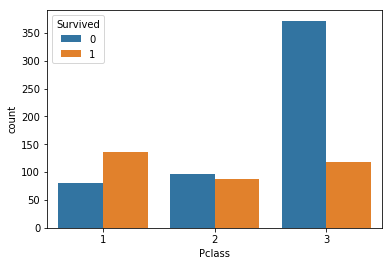

In [4]:
sns.countplot(data_train['Pclass'],hue=data_train['Survived'])
display(data_train[['Pclass','Survived']].groupby(['Pclass'], as_index = False).mean())

# Survived of sex

,Sex,Survived
0,female,0.742038
1,male,0.188908


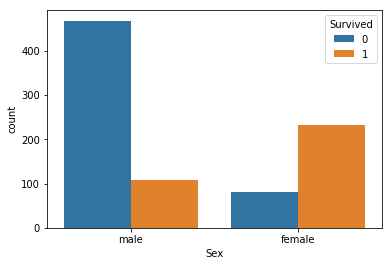

In [5]:
sns.countplot(data_train['Sex'],hue=data_train['Survived'])
display(data_train[['Sex','Survived']].groupby(['Sex'], as_index = False).mean())

# Survived of SibSp

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


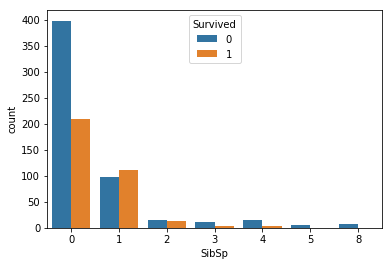

In [6]:
sns.countplot(data_train['SibSp'],hue=data_train['Survived'])
display(data_train[['SibSp','Survived']].groupby(['SibSp'], as_index = False).mean())

# Survived of Embarked

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


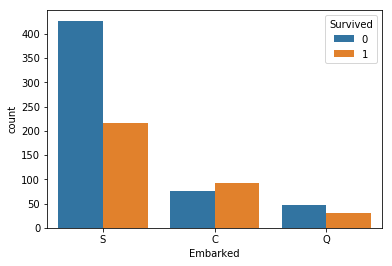

In [7]:
sns.countplot(data_train['Embarked'],hue=data_train['Survived'])
display(data_train[['Embarked','Survived']].groupby(['Embarked'], as_index = False).mean())

In [8]:
#填補Age缺失資料
age_median = np.nanmedian(data_train["Age"]) #平均值
new_Age = np.where(data_train["Age"].isnull(), age_median, data_train["Age"]) #將null填入平均值
new_Embarked = np.where(data_train["Embarked"].isnull(), 'N', data_train["Embarked"])
data_train["Age"] = new_Age
data_train["Embarked"] = new_Embarked
# 創造 dummy variables
label_encoder = preprocessing.LabelEncoder()
encoded_Sex = label_encoder.fit_transform(data_train["Sex"])
data_train['Embarked'].unique()
# data_train['Sex'].describe()
encoded_Embarked = label_encoder.fit_transform(data_train['Embarked'])
# print(encoded_Embarked)
#Traning 要素
data_train_X = pd.DataFrame([data_train['Age'],encoded_Sex,data_train['Pclass'],encoded_Embarked,data_train['SibSp'],data_train['Parch']]).T
#分類結果
data_train_Y = pd.DataFrame(data_train['Survived'])
train_X,test_X,train_Y,test_Y = train_test_split(data_train_X,data_train_Y,test_size = 0.1)

In [9]:
# 建立 SVC 模型
svc = svm.SVC()
svc_fit = svc.fit(train_X, train_Y)

/home/aclab/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/aclab/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [10]:
# 預測
test_y_predicted = svc.predict(test_X)

# Accuracy
fpr, tpr, thresholds = metrics.roc_curve(test_Y, test_y_predicted)
accuracy = metrics.accuracy_score(test_Y, test_y_predicted)
auc = metrics.auc(fpr, tpr)
print("Accuracy: ",accuracy)
print("AUC: ",auc)

Accuracy:  0.8555555555555555
AUC:  0.8209404045926736


In [12]:
age_median = np.nanmedian(data_test["Age"]) #平均值
new_Age = np.where(data_test["Age"].isnull(), age_median, data_test["Age"]) #將null填入平均值
new_Embarked = np.where(data_test["Embarked"].isnull(), 'N', data_test["Embarked"])
data_test["Age"] = new_Age
data_test["Embarked"] = new_Embarked
# 創造 dummy variables
label_encoder = preprocessing.LabelEncoder()
encoded_Sex = label_encoder.fit_transform(data_test["Sex"])
encoded_Embarked = label_encoder.fit_transform(data_test['Embarked'])
data_test_X = pd.DataFrame([data_test['Age'],encoded_Sex,data_test['Pclass'],encoded_Embarked,data_test['SibSp'],data_test['Parch']]).T
output_prediction = svc.predict(data_test_X)
output = pd.DataFrame([data_test['PassengerId'],output_prediction],index = ['PassengerId','Survived']).T
output.to_csv("Titanic_prediction.csv",header = True,index = False)